In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [212]:
d_e = pd.read_csv('e6400000_0_01_2000.txt', sep=' ')
d_e1 = pd.read_csv('e6400000_0_01_500.txt', sep=' ')


d_h = pd.read_csv('h6400000_0_01_2000.txt', sep=' ')
d_h1 = pd.read_csv('h6400000_0_01_100000.txt', sep = ' ')

##  Результаты использования обоих методов 

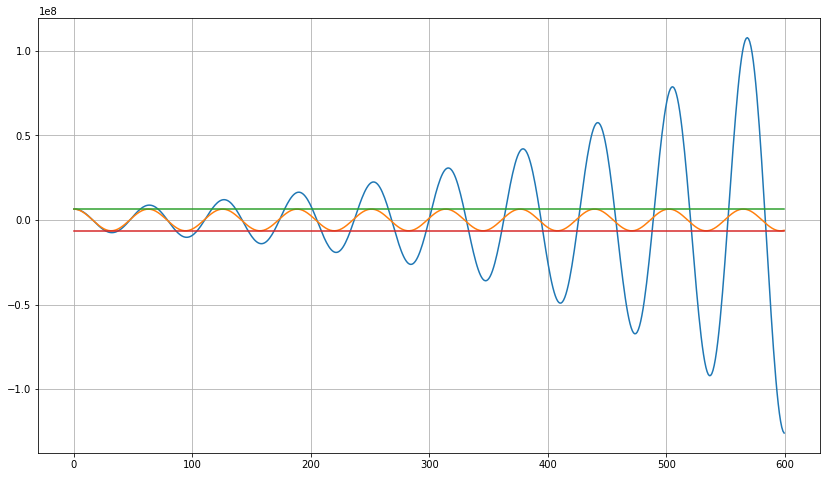

In [213]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

t = np.linspace(0, len(d_e), len(d_e))
t = t[:int(0.3*len(t))]

ax.plot(t, d_e.x[:int(len(t))])
ax.plot(t, d_h.x[:int(len(t))])
ax.plot(t, t-t+6400000)
ax.plot(t, t-t-6400000)
ax.grid(True)
plt.show()

При изменении координаты в методе Эйлера для каждого dt мы считаем движение равномерным и прямолинейным, а скорость меняем, как при ускоренном, вследствие чего гакапливается ошибка. 
В методе Нойна мы учитываем тот факт, что движение не является равномерным, внося поправку.

## Графики изменения удельной энергии системы с течением времени для каждого из методов

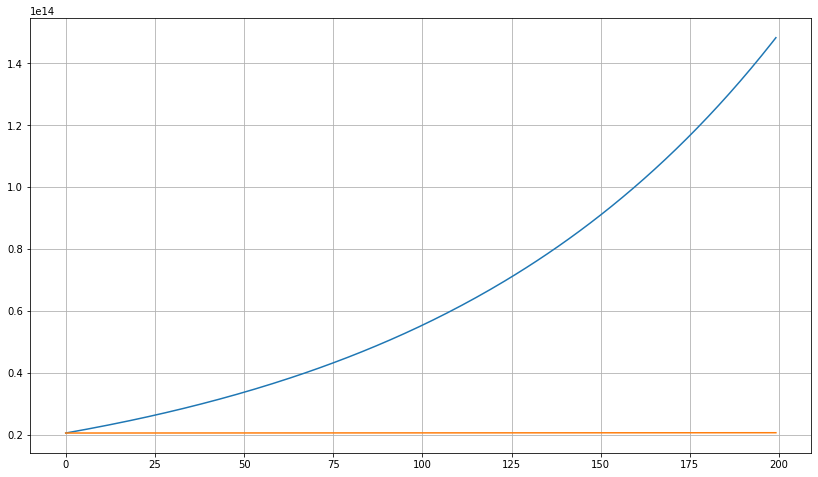

In [214]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

t = np.linspace(0, len(d_e), len(d_e))
t = t[:int(0.1*len(t))]

omega = 1
ax.plot(t, 0.5*(omega * d_e.x**2 + d_e.v**2)[:int(len(t))])
ax.plot(t, 0.5*(omega * d_h.x**2 + d_h.v**2)[:int(len(t))])
ax.grid(True)
plt.show()

## Фазовые диаграммы решений

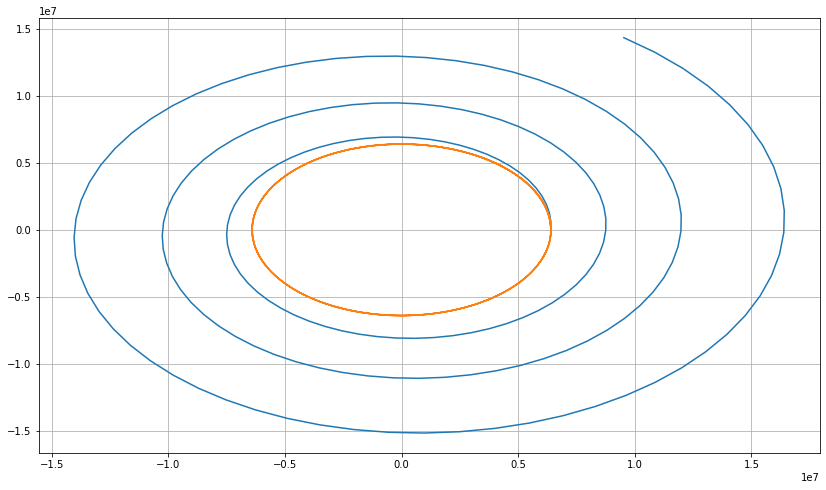

In [215]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

ax.plot(d_e.x[:int(0.1*len(d_e.x))], d_e.v[:int(0.1*len(d_e.x))])
ax.plot(d_h.x[:int(0.1*len(d_h.x))], d_h.v[:int(0.1*len(d_h.x))])
ax.grid(True)
plt.show()

## Исследование точности методов

### Относительный рост амплитуды колебаний для 2 методов

In [216]:
m_e =[]
m_h=[]
t = np.linspace(0, len(d_e), len(d_e))
for i in range(len(d_e1)):
    if (d_e1['max'][i] > 0): m_e.append(np.array([t[i], d_e1['max'][i]], dtype='float'))
t = np.linspace(0, len(d_h1), len(d_h1))
for i in range(len(d_h1)):
    if (d_h1['max'][i] > 0): m_h.append(np.array([t[i], d_h1['max'][i]], dtype='float'))
m_e = np.array(m_e, dtype='float')
m_h = np.array(m_h, dtype='float')

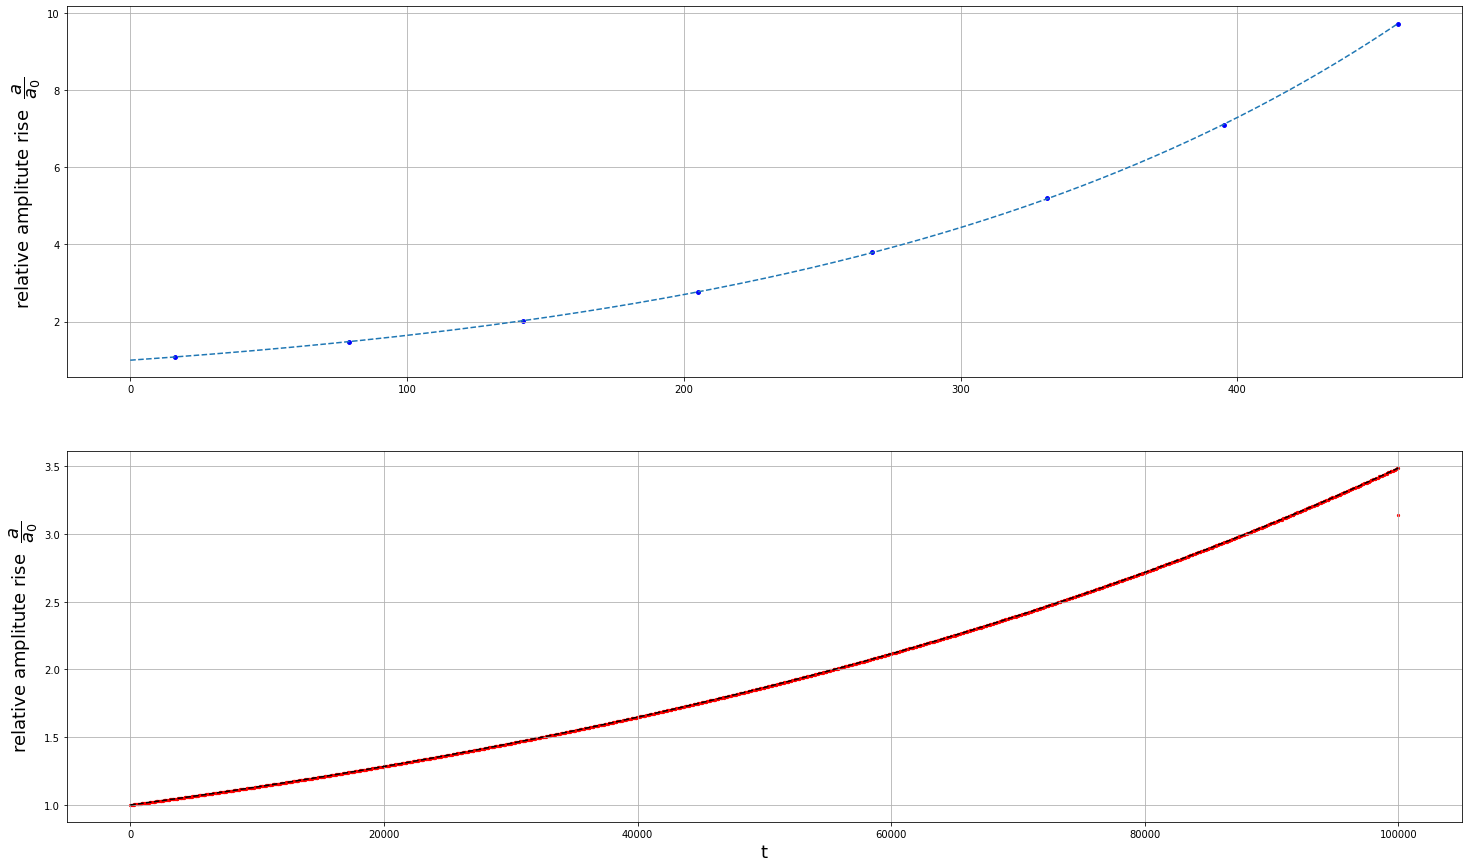

In [220]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(25, 15)

#t = t[:int(0.1*len(t))]


p_h = np.polyfit(m_h[:,0], np.log(m_h[:,1]), deg=1)
f_h = np.poly1d(p_h)
th = np.linspace(0, max(m_h[:,0]), len(d_h))
ax[1].plot(th, np.exp(f_h(th)), '--', zorder=2, c='black')

ax[0].scatter(m_e[:,0], m_e[:,1], c='blue', marker='o', label='Euler', s=15)
ax[1].scatter(m_h[:,0], m_h[:,1], c='red', marker='o', s=5, zorder=1)

p_e = np.polyfit(m_e[:,0], np.log(m_e[:,1]), deg=1)
f_e = np.poly1d(p_e)

te = np.linspace(0, max(m_e[:,0]), len(d_e))
ax[0].plot(te, np.exp(f_e(te)), '--')

ax[1].set_xlabel('t', fontsize=18)
ax[0].set_ylabel('relative amplitute rise $~\dfrac{a}{a_0}$', fontsize=18)
ax[1].set_ylabel('relative amplitute rise $~\dfrac{a}{a_0}$', fontsize=18)
#ax.legend(fontsize=16, loc='best')
ax[0].grid(True)
ax[1].grid(True)
plt.show()
